In [18]:
import numpy as np
import pandas as pd
import seaborn as sn
import utils as utils
import matplotlib as plt

# Task 1 : KNN with 4 features

### loading 30s dataset

In [19]:
df = utils.task3_df()
df

,zero_cross_rate_mean,spectral_rolloff_mean,mfcc_1_mean,tempo,Type,GenreID
0,0.131656,5351.909304,9.675074,117.453835,Train,0
1,0.099747,6839.566975,-63.635056,107.666016,Train,0
2,0.096015,6873.341771,-119.346458,161.499023,Train,0
3,0.183106,7534.996104,-26.936581,117.453835,Train,0
4,0.161897,7879.044023,-8.531343,129.199219,Train,0
...,...,...,...,...,...,...
985,0.047769,1838.497216,-270.312012,95.703125,Test,9
986,0.052424,2730.541822,-190.396072,95.703125,Test,9
987,0.095573,5135.260614,-149.196808,83.354335,Test,9
988,0.058125,4355.815328,-223.030594,161.499023,Test,9


In [20]:
X_train_scaled, y_train, X_test_scaled, y_test = utils.train_val_split(df)

### Begin knn training

In [21]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform')# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [22]:
res = knn.predict(X_test_scaled)

### Evaluation

Accuracy

In [23]:
np.mean(res == y_test)

0.46464646464646464

Confusion Matrix

<Axes: >

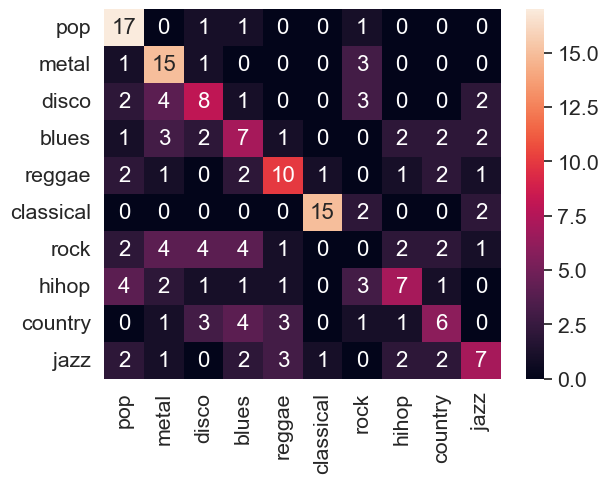

In [24]:
from sklearn.metrics import confusion_matrix

confMatrix = pd.DataFrame(confusion_matrix(y_test,res),utils.genreIDtoName,utils.genreIDtoName)
sn.set(font_scale=1.4)
sn.heatmap(confMatrix, annot=True, annot_kws={"size": 16})